# Одномерная оптимизация (10 баллов)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

В данном домашнем задании рассмотриваются несколько базовых подходов одномерной оптимизации, не использующих знания о градиенте функции. Для его выполнения потребуется следующее определение:

__Определение.__ Одномерная функция $f: [a, b] \to \mathbb{R}$ называется _унимодальной_ на $[a, b]$, если существует $c^{*} \in [a, b]$ такое, что:

1. Для произвольных $x, y \in [a, c^{*}]$, таких что $x < y$, выполнено $f(x) > f(y)$;

2. Для произвольных $x, y \in [c^{*}, b]$, таких что $x < y$, выполнено $f(x) < f(y)$.

Говоря менее формально, мы рассматриваем функции на отрезке, которые строго убывают слева от минимума и строго возрастают справа от него. Из определения незамедлительно следует, что минимум на отрезке $[a, b]$ единственен.

Описание метода __дихотомии__ (бисекции) для поиска минимума унимодальных функций:

1. __Инициализация:__

1.1. Задается унимодальная функция $f(x)$, которая имеет единственный минимум на интервале $[a,b]$.

1.2. Задается начальный интервал $[a,b]$, на котором ищется минимум.

1.3. Задается параметр $\varepsilon$ — точность, с которой нужно найти минимум.

2. __Итеративный шаг метода:__

2.1. Интервал $[a,b]$ делится пополам, и вычисляется середина интервала:

$$c = \frac{a + b}{2}$$

2.2. Выбираются две точки $x_1$ и $x_2$, близкие к середине интервала $c$, но не совпадающие с ней:

$$x_{1} = c - \delta, \quad x_{2} = c + \delta,$$

где $\delta$ небольшое положительное число, обычно $\delta \ll \varepsilon$, поэтому возьмите $\delta = \frac{\varepsilon}{10}$.

2.3. Вычисляются значения функции в точках $x_1$ и $x_2$:

$\bullet$ Если $f(x_{1}) < f(x_{2})$, то минимум находится на отрезке $[a, x_{2}]$, поэтому зона поиска оптимума сужается до $[a, x_2]$.

$\bullet$ Если $f(x_{1}) > f(x_{2})$, то минимум находится на отрезке $[x_{1}, b]$, поэтому зона поиска оптимума сужается до $[x_1, b]$.

$\bullet$ Если $f(x_{1}) = f(x_{2})$, то минимум находится на отрезке $[x_{1}, x_{2}]$, поэтому зона поиска оптимума сужается до $[a, x_{2}]$ или $[x_1, b]$.

3. __Проверка точности:__

$\bullet$ Если длина нового интервала меньше заданной точности $\varepsilon$, то процесс завершается и возвращается значение $c_{\text{out}}$ ($c$ с последней итерации).

$\bullet$ Если длина нового интервала больше заданной точности $\varepsilon$, то повторяется шаг 2 для нового интервала.

__а) (0.5 балла)__ Докажите, что данный алгоритм находит минимум унимодальной функции на отрезке $[a, b]$ с точностью $\varepsilon$ . 

Пусть $a_0, \ldots, a_N$ и $b_0, \ldots b_N$ зоны поиска в процессе работы алгоритма. Пусть $c^*$ — точка минимума $f(x)$ на $[a_0, b_0]$. 

### 1. Конечность

После каждого шага (2) длина зоны поиска оптимума уменьшается примерно вдвое ($b_k - a_k = \frac{b_{k-1} - a_{k-1}}{2} + \delta$), следовательно, мы дойдём до условия остановки (длина меньше $\varepsilon$). Значит, процесс (алгоритм) конечен.

### 2. Корректность

**Утв.** $c^*$ всегда находится в зоне поиска оптимума.

**Д-во.** Индукция по кол-ву итераций k.

База. По условию, $c^* \in [a, b] = [a_0, b_0]$.

Переход. Пусть алгоритм проработал $k$ итераций, тогда:

1. $f(x^k_1) < f(x^k_2)$, т.е. возрастает на $[x_k^1, x_k^2]$. Положим противное: $x^* > x_k^2$, значит, функция убывает на $[x_k^1, x_k^2]$, противоречие. Следовательно, $c^*$ сохранится в зоне поиска $[a_k, x_k^2]$;

2. $f(x_k^1) > f(x_k^2)$ — аналогично п. 1. Следовательно, $c^*$ сохранится в зоне поиска $[x_k^1, b_k]$;

3. $f(x_k^1) = f(x_k^2)$, $f(x)$ — унимодальная, следовательно, $c^* \in [x^k_1, x^k_2]$. Сужение зоны поиска в $[a_k, x_k^2]$ или $[x_k^1, b_k]$ сохранит $c^*$ в зоне поиска.

Соответственно, когда мы дойдём до $N$-го шага:

- $b_N - a_N < \varepsilon$;

- $c^* \in [a_N, b_N]$.

Проверим сохранение точности: $|c^* - c_{N-1}| = |c^* - c_\text{out}| \leqslant \tfrac{1}{2}|b_{N-1} - a_{N-1}| = |b_N - a_N| - \delta \leqslant \varepsilon - \delta < \varepsilon$, ч.т.д.

__б) (0.5 балла)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{\text{out}} - c^*| \leq \varepsilon$)?

Необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

__Замечание__. Величиной $\delta$ надо пренебречь.

Пусть $l_k = b_k - a_k$. Тогда $l_{k + 1} = \frac{l_k}{2} + \delta$. Требуется $l_N < \varepsilon \Longrightarrow l_N = 2\delta + \frac{l_0 - 2\delta}{2^N} \approx \frac{l_0}{2^N} < \varepsilon \Longrightarrow N \leqslant \lceil \log_2{\frac{l_0}{\varepsilon}}\rceil$.

На каждой итерации делается по два запроса оракулу, значит, оракульная сложность будет составлять $\leqslant 2N = O\left(\log_2{\frac{l_0}{\varepsilon}}\right)$. Такая же оценка на кол-во подсчётов значений $f$.

На каждой итерации выполняется $O(1)$ операций, следовательно, всего $O(N) = O\left(\log_2{\frac{l_0}{\varepsilon}}\right)$ элементарных операций — итерационная сложность.

__в) (1 балл)__ Придумайте свою унимодальную функцию на отрезке. 

1. Покажите, что она является унимодальной на этом отрезке (аналитически).

2. Найдите $c^{*}$ (аналитически).

3. Нарисуйте график функции.

Возьмём $f(x) = (x-3)^2 + 5 = x^2 - 6x + 14,\ a_0 = -10,\ b_0 = 10$.

Докажем, что $f(x)$ унимодальна на $[0;6]$. Рассмотрим $f'(x) = 2x - 6 = 0 \Longleftrightarrow x = 3$. Также $\forall x \in [-10, 3):\ f'(x) < 0$, а $\forall x \in (3, 10]:\ f'(x) > 0$, т.е. $f(x)$ строго убывает до $x=3$ и строго возрастает после него. Значит, $f(x)$ действительно унимодальна на $[-10, 10]$.

Из выкладок выше, $c^* = 3$.

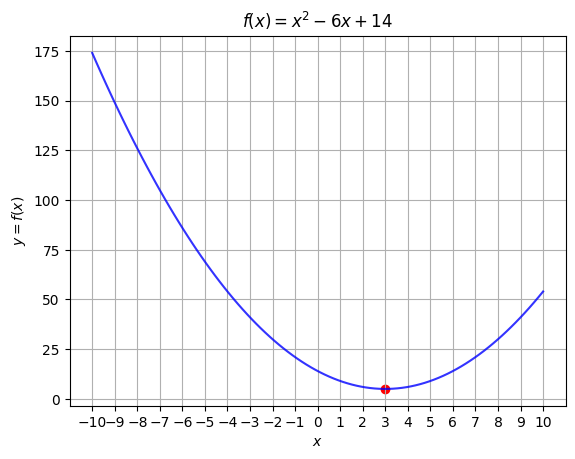

In [106]:
x = np.linspace(-10, 10, 100)
f = lambda x: x**2 - 6*x + 14

sns.lineplot(x=x, y=f(x), color='blue', alpha=0.8)
plt.scatter(3, f(3), color='red')

plt.title(r'$f(x) = x^2 - 6x + 14$')
plt.xticks(np.arange(-10, 11, 1))
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.grid()
plt.show()

__г) (1.5 балла)__ Реализуйте метод дихотомии.

In [108]:
def dichotomy_method(f: callable, a: float, b: float, c_star: float, max_iter: int = 100, epsilon: float = 1e-6, **params) -> tuple[float, list]:
    """
    Метод дихотомии для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        max_iter (int, optional): Максимальное количество итераций. По умолчанию 100.
        epsilon (float, optional): Точность поиска. 
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.
        **params: Именованные гиперпараметры метода.
            params['delta'] - значение гиперпараметра для поиска точек x1 и x2.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """
    
    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")
    
    history = []
    delta = params.get('delta', epsilon / 10)
    cur_a, cur_b = a, b
    cur_c = None

    while cur_b - cur_a > epsilon and len(history) < max_iter:
        cur_c = (cur_a + cur_b) / 2
        x1 = cur_c - delta
        x2 = cur_c + delta

        if f(x1) < f(x2):
            cur_b = x2
        else:
            cur_a = x1

        history.append(abs(cur_c - c_star))

    return cur_c, history

Постройте сравнительный график зависимости точности метода $|c_{\text{out}} - c^*|$ и теоретической оценки от числа итераций. Значение $\delta$ выберите равным $10^{-8} \cdot (b - a)$. График должен соответствовать следующим критериям:

1. Размер должен быть удобен для чтения
2. Масштаб осей (обычный или логарифмический)
3. Подписи осей 
4. Легенда (так как на графике несколько линий)
5. Толщина/цвет/сетка (на ваше усмотрение, но должно быть читаемо)

In [109]:
a, b = -10, 10
c_star = 3
delta = 1e-8 * (b - a)
c, history = dichotomy_method(f, a, b, c_star, delta=delta)

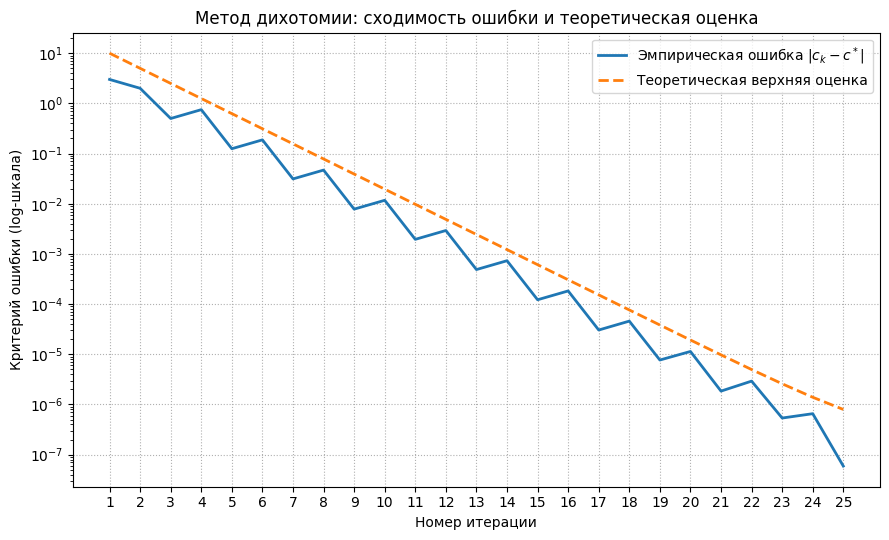

In [110]:
length = b - a
iters = np.arange(1, len(history) + 1)
theor_score = delta + (length - 2 * delta) / (2.0 ** iters)

plt.figure(figsize=(9, 5.5))
sns.lineplot(x=iters, y=history, linewidth=2, label='Эмпирическая ошибка $|c_k - c^*|$')
sns.lineplot(x=iters, y=theor_score, linewidth=2, linestyle='--', label='Теоретическая верхняя оценка')

plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Критерий ошибки (log-шкала)')
plt.title('Метод дихотомии: сходимость ошибки и теоретическая оценка')

plt.grid(True, linestyle=':', linewidth=0.8)
plt.xticks(iters)
plt.legend()
plt.tight_layout()
plt.show()

__д) (1 балл)__ Теперь сравним работу метода при разных значениях гиперпараметра $\delta$. Предлагается рассмотреть следующие значения:
1. $\delta = 10^{-12} \cdot (b - a)$;
2. $\delta = 10^{-9} \cdot (b - a)$;
3. $\delta = 10^{-6} \cdot (b - a)$;
4. $\delta = 10^{-3} \cdot (b - a)$;
5. $\delta = 10^{-1} \cdot (b - a)$.

Постройте сравнительный график зависимости критерия от номера итерации.

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dq/3kgld0711lq14461_889hxhr0000gn/T/ipykernel_37340/1788911108.py:20: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Метод дихотомии: влияние параметра $\delta$ на сходимость')
/var/folders/dq/3kgld0711lq14461_889hxhr0000gn/T/ipykernel_37340/1788911108.py:24: SyntaxWarning: invalid escape sequence '\d'
  plt.legend(title='Значение $\delta$')


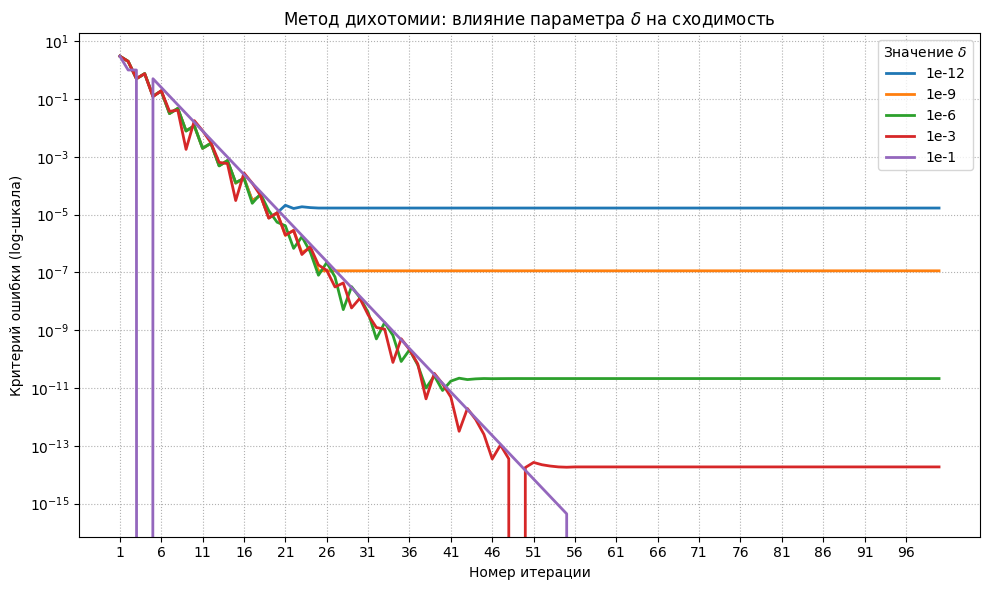

In [112]:
degs = [-12, -9, -6, -3, -1]
deltas = [float(f'1e{deg}') * length for deg in degs]
histories = []

for delta in deltas:
    _, history = dichotomy_method(f, a, b, c_star, delta=delta)
    histories.append(history)

max_len = max(len(h) for h in histories)
iters = np.arange(1, max_len + 1)

plt.figure(figsize=(10, 6))
for i, (delta, history) in enumerate(zip(deltas, histories)):
    padded_history = history + [history[-1]] * (max_len - len(history))
    sns.lineplot(x=iters, y=padded_history, linewidth=2, label=f'1e{degs[i]}')

plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Критерий ошибки (log-шкала)')
plt.title('Метод дихотомии: влияние параметра $\delta$ на сходимость')

plt.grid(True, linestyle=':', linewidth=0.8)
plt.xticks(iters[::5])
plt.legend(title='Значение $\delta$')
plt.tight_layout()
plt.show()

Что можно сказать о зависимости сходимости от значения параметра $\delta$? Объясните, почему для малых значений наблюдается плохая сходимость. Для какого значения наблюдается наилучшая сходимость?

Наблюдается следующая зависимость: чем меньше $\delta$, тем хуже итоговая сходимость. Это объясняется тем, что при слишком малом $\delta$ разница между значениями функции становится чрезвычайно малой, что мешает сужению интервала и, как следствие, сходимости алгоритма.

Наилучшая сходимость наблюдается для $\delta = 10^{-1}$.

__e) (2 балла)__ До этого использовался подход с использованием постоянной величины $\delta$. Рассмотрим адаптивный подход, а именно - на каждой итерации значения $\delta$ будет определяться через длину интервала $l_k$, полученную на $k$-ой итерации. Предлагается рассмотреть следующие значения:

1. $\delta = 10^{-6} \cdot l_k$;
2. $\delta = 10^{-3} \cdot l_k$;
3. $\delta = 10^{-1} \cdot l_k$;
4. $\delta = 6^{-1} \cdot l_k$.

Последняя модификация также называется __тернарным__ поиском, при которой отрезок делится на 3 части на каждой итерации.

Постройте сравнительный график сходимости значения критерия от различных значений $\delta$. Также добавьте на график сходимость с наилучшим постоянным значением $\delta$, полученном в предыдущем пункте.

In [113]:
def get_delta(mult: float) -> callable:
    def get_delta_inner(a: float, b: float) -> float:
        return mult * (b - a)
    return get_delta_inner


def dichotomy_adaptive(f, a, b, c_star, max_iter=100, epsilon=1e-6, **params):
    """
    Метод дихотомии для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        max_iter (int, optional): Максимальное количество итераций. По умолчанию 100.
        epsilon (float, optional): Точность поиска. 
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.
        **params: Именованные гиперпараметры метода.
            params['delta'](a, b) - функция, возвращающая значение интервала на k-ой итерации.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """
    
    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")
        
    history = []
    get_delta = params['delta']
    cur_a, cur_b = a, b
    cur_c = None

    while cur_b - cur_a > epsilon and len(history) < max_iter:
        cur_c = (cur_a + cur_b) / 2
        cur_delta = get_delta(cur_a, cur_b)
        x1 = cur_c - cur_delta
        x2 = cur_c + cur_delta

        if f(x1) < f(x2):
            cur_b = x2
        else:
            cur_a = x1

        history.append(abs(cur_c - c_star))

    return cur_c, history

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dq/3kgld0711lq14461_889hxhr0000gn/T/ipykernel_37340/2853976117.py:15: SyntaxWarning: invalid escape sequence '\c'
  sns.lineplot(x=iters, y=padded_history, linewidth=2, label=f'{mults[i]:.3e} $\cdot l_k$')
/var/folders/dq/3kgld0711lq14461_889hxhr0000gn/T/ipykernel_37340/2853976117.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Метод адаптивной дихотомии: сравнение сходимости адаптивного параметра $\delta$ и одного фиксированного')
/var/folders/dq/3kgld0711lq14461_889hxhr0000gn/T/ipykernel_37340/2853976117.py:26: SyntaxWarning: invalid escape sequence '\d'
  plt.legend(title='Значение $\delta$')


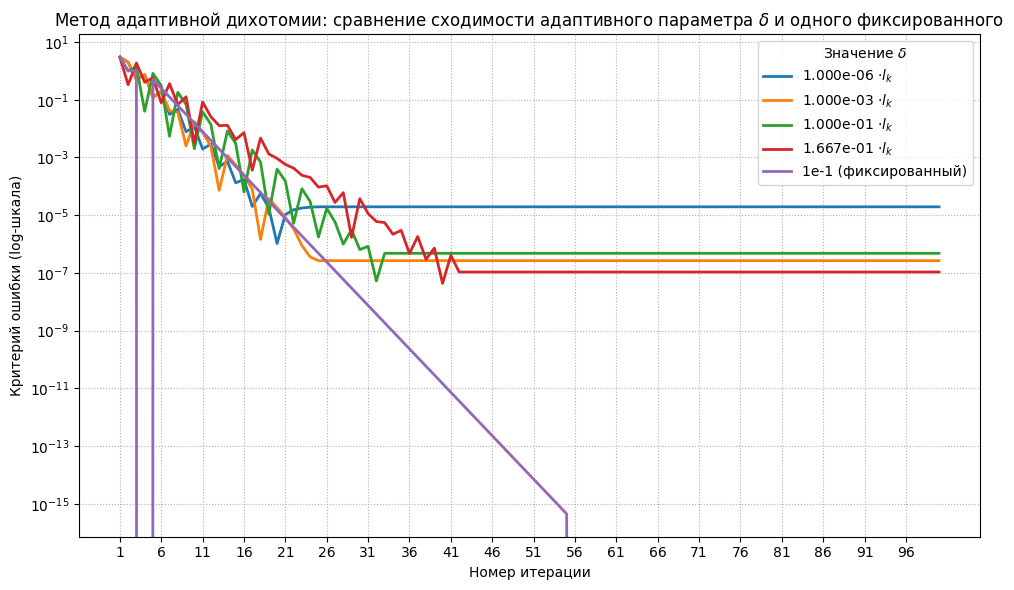

In [115]:
mults = [1e-6, 1e-3, 1e-1, 1/6]
deltas = [get_delta(mult) for mult in mults]

adaptive_histories = []
for delta in deltas:
    _, history = dichotomy_adaptive(f, a, b, c_star, delta=delta)
    adaptive_histories.append(history)

max_len = max(len(h) for h in adaptive_histories + [histories[-1]])
iters = np.arange(1, max_len + 1)

plt.figure(figsize=(10, 6))
for i, (delta, history) in enumerate(zip(deltas, adaptive_histories)):
    padded_history = history + [history[-1]] * (max_len - len(history))
    sns.lineplot(x=iters, y=padded_history, linewidth=2, label=f'{mults[i]:.3e} $\cdot l_k$')
sns.lineplot(x=iters, y=histories[-1] + [histories[-1][-1]] * (max_len - len(histories[-1])), linewidth=2, label=f'1e-1 (фиксированный)')


plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Критерий ошибки (log-шкала)')
plt.title('Метод адаптивной дихотомии: сравнение сходимости адаптивного параметра $\delta$ и одного фиксированного')

plt.grid(True, linestyle=':', linewidth=0.8)
plt.xticks(iters[::5])
plt.legend(title='Значение $\delta$')
plt.tight_layout()
plt.show()

Помогает ли использование адаптивного подхода в достижении лучшей сходимости?

Наблюдается более стабильное схождение, чем у подхода с фиксированной $\delta$. Однако это не помогает достичь сходимости того же качества, что при фиксированным значением $\delta = 10^{-1}$.

__ё) (2 балла)__ Реализуйте метод __золотого сечения__. Для этого на каждой итерации подсчитываются точки $x_{1}, x_{2}$, симметричные относительно середины интервала и делящие исходный интервал в пропорции золотого сечения, то есть 1 к $\frac{1 + \sqrt{5}}{2}$. Обновления краевого значения происходит по аналогичной процедуре. 

In [118]:
def golden_ration_method(f: callable, a: float, b: float, c_star: float, epsilon: float = 1e-6):
    """
    Метод золотого сечения для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        epsilon (float, optional): Точность поиска. 
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """
    
    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")

    history = []

    phi = (1 + 5 ** 0.5) / 2 
    inv_phi = 1 / phi

    x1 = b - (b - a) * inv_phi
    x2 = a + (b - a) * inv_phi
    f1, f2 = f(x1), f(x2)

    while (b - a) > epsilon:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - (b - a) * inv_phi
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (b - a) * inv_phi
            f2 = f(x2)

        c = (a + b) / 2
        history.append(abs(c - c_star))

    return (a + b) / 2, history

Постройте график сходимости.

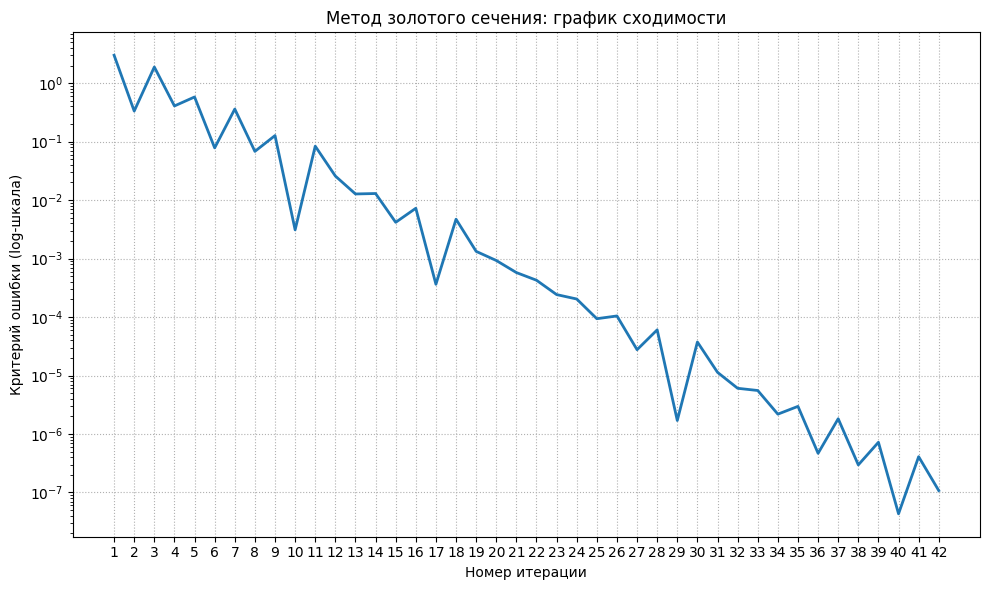

In [119]:
a, b = -10, 10
c_star = 3
c, golden_history = golden_ration_method(f, a, b, c_star)

length = b - a
iters = np.arange(1, len(history) + 1)

plt.figure(figsize=(10, 6))
sns.lineplot(x=iters, y=history, linewidth=2)

plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Критерий ошибки (log-шкала)')
plt.title('Метод золотого сечения: график сходимости')

plt.grid(True, linestyle=':', linewidth=0.8)
plt.xticks(iters)
plt.tight_layout()
plt.show()

__ж) (1.5 балла)__ Постройте сравнительные графики для методов ```dichotomy_method```, ```dichotomy_adaptive``` и ```golden_ratio_method``` для оптимальных значений параметра $\delta$. Первый график должен быть значением критерия от числа итераций.

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dq/3kgld0711lq14461_889hxhr0000gn/T/ipykernel_37340/741769133.py:9: SyntaxWarning: invalid escape sequence '\d'
  sns.lineplot(x=iters, y=padded_history, linewidth=2, label='Дихотомия (фиксированный $\delta = 1e-1$)')


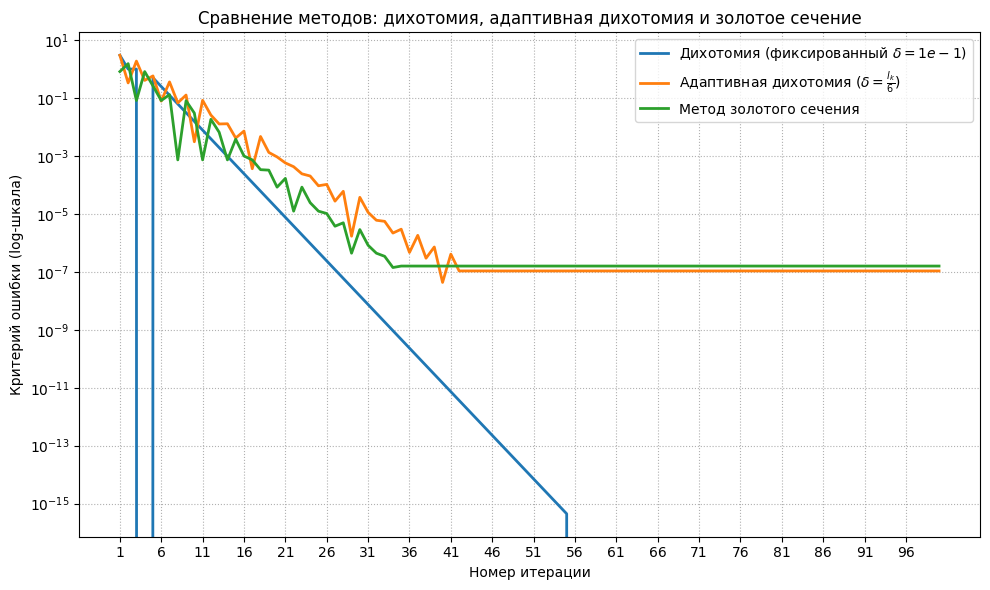

In [120]:
max_len = max(len(histories[-1]), len(adaptive_histories[-1]), len(golden_history))
iters = np.arange(1, max_len + 1)

plt.figure(figsize=(10, 6))
padded_history = histories[-1] + [histories[-1][-1]] * (max_len - len(histories[-1]))
paded_adaptive_history = adaptive_histories[-1] + [adaptive_histories[-1][-1]] * (max_len - len(adaptive_histories[-1]))
padded_golden_history = golden_history + [golden_history[-1]] * (max_len - len(golden_history))

sns.lineplot(x=iters, y=padded_history, linewidth=2, label='Дихотомия (фиксированный $\delta = 1e-1$)')
sns.lineplot(x=iters, y=paded_adaptive_history, linewidth=2, label=r'Адаптивная дихотомия ($\delta = \frac{l_k}{6}$)')
sns.lineplot(x=iters, y=padded_golden_history, linewidth=2, label='Метод золотого сечения')

plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Критерий ошибки (log-шкала)')
plt.title('Сравнение методов: дихотомия, адаптивная дихотомия и золотое сечение')

plt.grid(True, linestyle=':', linewidth=0.8)
plt.xticks(iters[::5])
plt.legend()
plt.tight_layout()
plt.show()

Второй - критерий от количества вызовов функции $f$.

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dq/3kgld0711lq14461_889hxhr0000gn/T/ipykernel_37340/4142863914.py:8: SyntaxWarning: invalid escape sequence '\d'
  sns.lineplot(x=iters, y=padded_history_oracle, linewidth=2, label='Дихотомия (фиксированный $\delta = 1e-1$)')


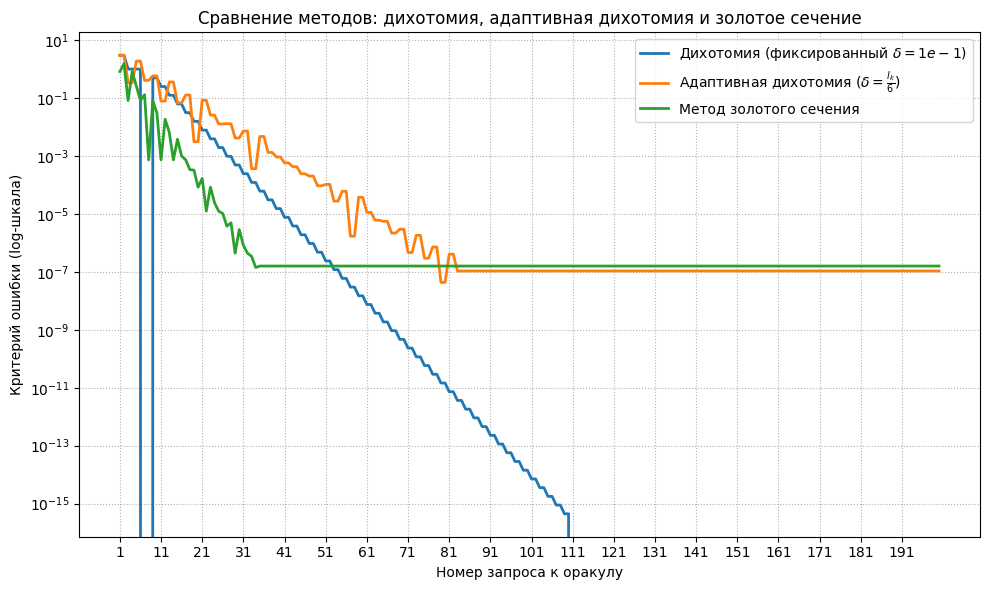

In [121]:
padded_history_oracle = np.array([[h] * 2 for h in padded_history]).flatten().tolist()
padded_adaptive_history_oracle = np.array([[h] * 2 for h in paded_adaptive_history]).flatten().tolist()
max_len = max(len(padded_history_oracle), len(padded_adaptive_history_oracle))
padded_golden_history_oracle = padded_golden_history + [golden_history[-1]] * (max_len - len(padded_golden_history))
iters = np.arange(1, max_len + 1)

plt.figure(figsize=(10, 6))
sns.lineplot(x=iters, y=padded_history_oracle, linewidth=2, label='Дихотомия (фиксированный $\delta = 1e-1$)')
sns.lineplot(x=iters, y=padded_adaptive_history_oracle, linewidth=2, label=r'Адаптивная дихотомия ($\delta = \frac{l_k}{6}$)')
sns.lineplot(x=iters, y=padded_golden_history_oracle, linewidth=2, label='Метод золотого сечения')

plt.yscale('log')
plt.xlabel('Номер запроса к оракулу')
plt.ylabel('Критерий ошибки (log-шкала)')
plt.title('Сравнение методов: дихотомия, адаптивная дихотомия и золотое сечение')

plt.grid(True, linestyle=':', linewidth=0.8)
plt.xticks(iters[::10])
plt.legend()
plt.tight_layout()
plt.show()

Что можно сказать о применимости метода золотого сечения? В чем он лучше по сравнению с методом дихотомии? 

Метод золотого сечения проявляется себя не сильно хуже, чем дихотомия и её адаптивный аналог. Однако преимущество метода золотого сечения заключается в оракульной сложности меньшей в два раза в сравнении с дихотомией. Действительно, на каждой итерации дихотомии мы производим по два запроса к оракулу, в то время как в методе золотого сечения на каждой итерации мы вызываем оракул лишь единожды. Это подтверждает график выше: золотое сечение действительно сходится быстрее, чем дихотомии.